In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [19]:
train_labels

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [20]:
train_data

tensor([[ 4.4960, -0.9767],
        [ 5.7428, -0.5145],
        [ 1.7710,  0.9800],
        ...,
        [ 4.4772, -0.9725],
        [ 3.2305, -0.0887],
        [ 4.0663, -0.7984]])

In [21]:
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [25]:
train_set     #features zero collumn and ones column with labels

[(tensor([ 4.4960, -0.9767]), tensor(0.)),
 (tensor([ 5.7428, -0.5145]), tensor(0.)),
 (tensor([1.7710, 0.9800]), tensor(0.)),
 (tensor([1.6217, 0.9987]), tensor(0.)),
 (tensor([ 3.9654, -0.7337]), tensor(0.)),
 (tensor([ 3.7702, -0.5881]), tensor(0.)),
 (tensor([ 5.8509, -0.4190]), tensor(0.)),
 (tensor([1.3527, 0.9763]), tensor(0.)),
 (tensor([ 3.7905, -0.6043]), tensor(0.)),
 (tensor([ 4.6042, -0.9942]), tensor(0.)),
 (tensor([1.1669, 0.9195]), tensor(0.)),
 (tensor([ 3.2048, -0.0632]), tensor(0.)),
 (tensor([ 4.7404, -0.9996]), tensor(0.)),
 (tensor([1.8120, 0.9710]), tensor(0.)),
 (tensor([ 3.6283, -0.4678]), tensor(0.)),
 (tensor([0.2252, 0.2233]), tensor(0.)),
 (tensor([0.6448, 0.6011]), tensor(0.)),
 (tensor([2.1483, 0.8378]), tensor(0.)),
 (tensor([2.7645, 0.3682]), tensor(0.)),
 (tensor([ 3.9842, -0.7464]), tensor(0.)),
 (tensor([ 3.9106, -0.6954]), tensor(0.)),
 (tensor([ 3.9801, -0.7436]), tensor(0.)),
 (tensor([ 5.3908, -0.7786]), tensor(0.)),
 (tensor([0.9877, 0.8348]), t

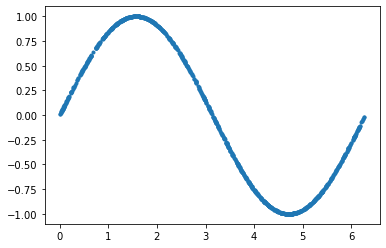

In [26]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [27]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [28]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [29]:
discriminator = Discriminator()

In [30]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [31]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [32]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [33]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.24200060963630676
Epoch: 0 Loss G.: 1.9439053535461426
Epoch: 10 Loss D.: 0.5974302887916565
Epoch: 10 Loss G.: 0.8383427858352661
Epoch: 20 Loss D.: 0.6582799553871155
Epoch: 20 Loss G.: 0.8741861581802368
Epoch: 30 Loss D.: 0.676961362361908
Epoch: 30 Loss G.: 0.7189830541610718
Epoch: 40 Loss D.: 0.8191204071044922
Epoch: 40 Loss G.: 0.7543834447860718
Epoch: 50 Loss D.: 0.6643311977386475
Epoch: 50 Loss G.: 0.7086718082427979
Epoch: 60 Loss D.: 0.6687117218971252
Epoch: 60 Loss G.: 0.7251384258270264
Epoch: 70 Loss D.: 0.6956933736801147
Epoch: 70 Loss G.: 0.6623538732528687
Epoch: 80 Loss D.: 0.6791689991950989
Epoch: 80 Loss G.: 0.6717435717582703
Epoch: 90 Loss D.: 0.6608151793479919
Epoch: 90 Loss G.: 0.7871125340461731
Epoch: 100 Loss D.: 0.6846416592597961
Epoch: 100 Loss G.: 0.605230987071991
Epoch: 110 Loss D.: 0.6856206655502319
Epoch: 110 Loss G.: 0.7021614909172058
Epoch: 120 Loss D.: 0.6920033693313599
Epoch: 120 Loss G.: 0.7051126956939697
Epoch: 13

In [34]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

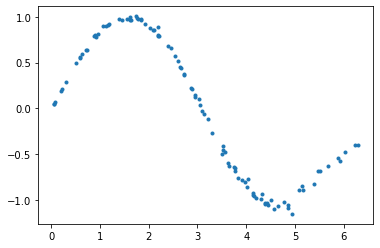

In [35]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [36]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [37]:
torch.manual_seed(111)

In [38]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [39]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [18]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
